In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [4]:
#peek at data
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
146148,87492.0,2.020999,0.221892,-1.691421,1.189209,0.687753,-0.629171,0.554687,-0.273722,-0.098033,...,0.081158,0.463763,-0.054519,-0.378820,0.488198,-0.487313,-0.015015,-0.075695,2.49,0
152819,97472.0,-0.166872,0.587606,1.611097,-0.068327,-0.772710,-0.464333,0.017035,-0.158014,1.973669,...,0.106568,0.674295,0.285161,0.443510,-1.800044,0.261290,0.007776,0.260428,39.00,0
152714,97446.0,1.974137,-0.414604,0.214343,0.541026,-0.947125,-0.378968,-0.955185,-0.064110,2.643697,...,-0.119637,0.059012,0.304962,-0.137337,-0.596552,0.448455,-0.038740,-0.043956,15.95,0
185777,126818.0,1.647630,-0.127201,-3.435670,0.545875,1.164934,-0.815591,0.730454,-0.262631,-0.078144,...,0.016145,-0.359852,-0.222783,-0.116794,0.082621,0.658147,-0.114380,0.027860,230.00,0
169001,119481.0,0.997685,-2.089098,-2.176119,0.305539,-0.328989,-0.058952,0.570013,-0.147944,0.994874,...,0.648046,0.778955,-0.585684,0.327970,0.227105,-0.321023,-0.108948,0.028527,551.83,0


In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# #numerical summary -> only non-anonymized columns of interest
# pd.set_option('precision', 3)
# df.loc[:, ['Time', 'Amount']].describe()

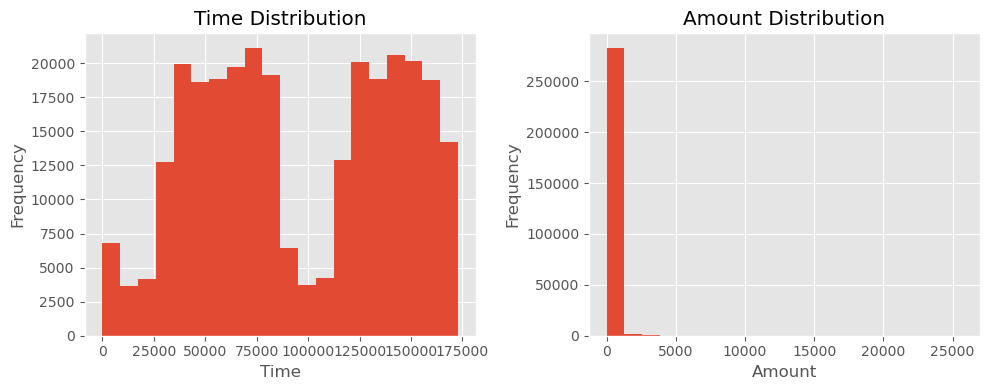

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the precision option
pd.set_option('display.precision', 3)

# Assuming 'df' is your DataFrame
df[['Time', 'Amount']].describe()

# Visualizations
plt.figure(figsize=(10, 4))

# Plot Time
plt.subplot(1, 2, 1)
plt.hist(df['Time'], bins=20)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Time Distribution')

# Plot Amount
plt.subplot(1, 2, 2)
plt.hist(df['Amount'], bins=20)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Amount Distribution')

plt.tight_layout()
plt.show()


C:\Users\DELL\New folder (2)\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Time Feature'}, xlabel='Time', ylabel='Density'>

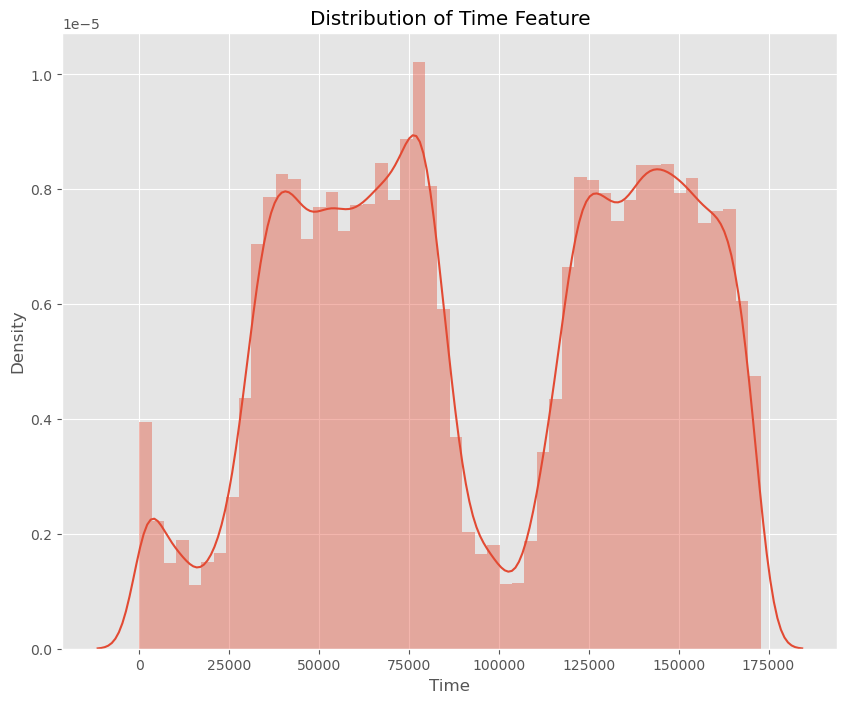

In [8]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

C:\Users\DELL\New folder (2)\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Monetary Value Feature'}, xlabel='Amount', ylabel='Density'>

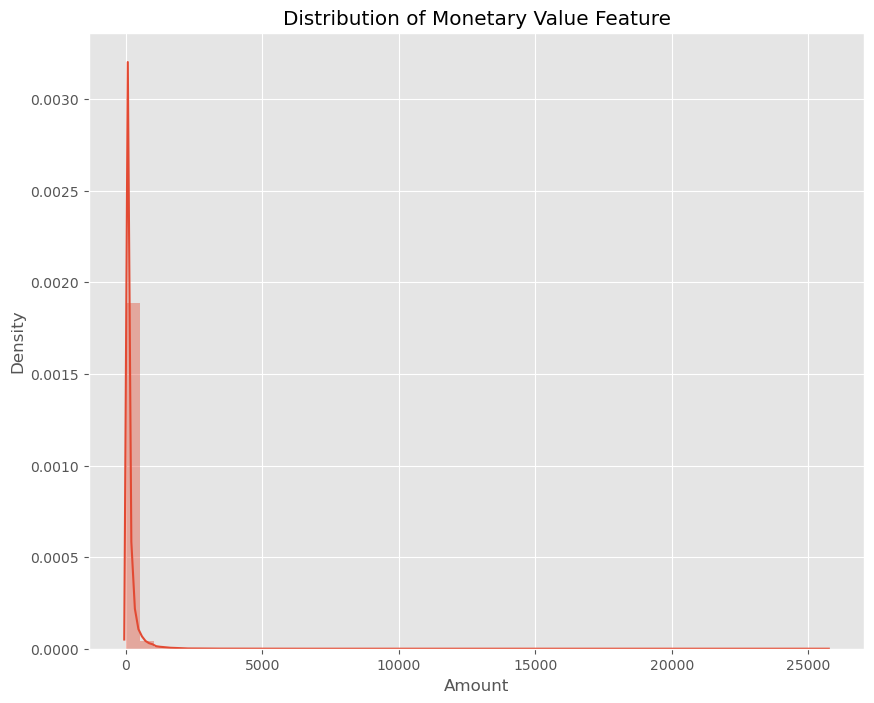

In [9]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [10]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

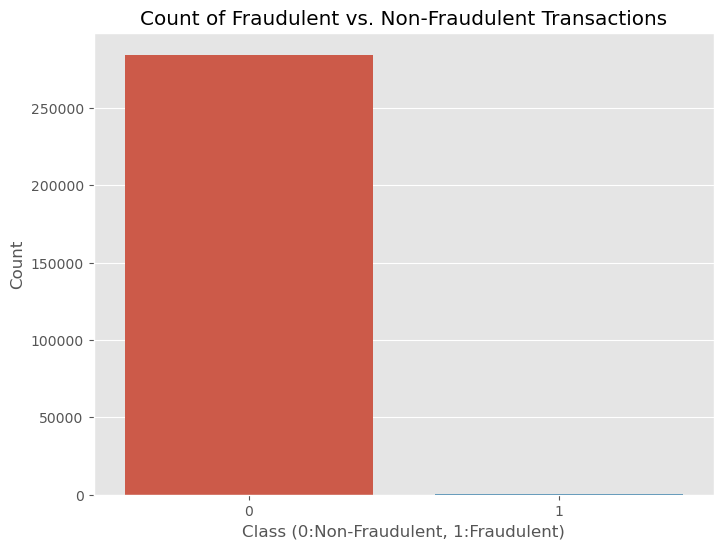

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [12]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.136e-16,-1.228e-15,-9.215e-16,1.813e-17,-6.507e-16,-1.005e-15,-2.434e-16,-1.514e-16,...,-2.457e-16,-4.291e-16,6.169e-16,-4.425e-17,-9.606e-16,-1.581e-17,1.198e-16,2.083e-15,-2.277e-01,-1.013e-01
V2,-0.011,4.136e-16,1.000e+00,3.244e-16,-1.121e-15,5.158e-16,2.787e-16,2.056e-16,-5.377e-17,1.978e-17,...,-8.480e-17,1.526e-16,1.634e-16,1.248e-17,-4.479e-16,2.057e-16,-4.967e-16,-5.094e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.228e-15,3.244e-16,1.000e+00,4.711e-16,-6.539e-17,1.628e-15,4.895e-16,-1.269e-15,5.568e-16,...,5.706e-17,-1.134e-15,-4.983e-16,2.687e-19,-1.105e-15,-1.238e-16,1.046e-15,9.776e-16,-2.109e-01,-1.930e-01
V4,-0.105,-9.215e-16,-1.121e-15,4.711e-16,1.000e+00,-1.720e-15,-7.492e-16,-4.105e-16,5.697e-16,6.923e-16,...,-1.950e-16,-6.276e-17,9.164e-17,1.585e-16,6.071e-16,-4.247e-16,3.977e-17,-2.761e-18,9.873e-02,1.334e-01
V5,0.173,1.813e-17,5.158e-16,-6.539e-17,-1.720e-15,1.000e+00,2.408e-16,2.716e-16,7.437e-16,7.392e-16,...,-3.921e-16,1.254e-16,-8.429e-18,-1.149e-15,4.809e-16,4.320e-16,6.590e-16,-5.614e-18,-3.864e-01,-9.497e-02
V6,-0.063,-6.507e-16,2.787e-16,1.628e-15,-7.492e-16,2.408e-16,1.000e+00,1.192e-16,-1.104e-16,4.131e-16,...,5.833e-17,-4.705e-19,1.047e-16,-1.072e-15,4.563e-16,-1.357e-16,-4.452e-16,2.595e-16,2.160e-01,-4.364e-02
V7,0.085,-1.005e-15,2.056e-16,4.895e-16,-4.105e-16,2.716e-16,1.192e-16,1.000e+00,3.344e-16,1.123e-15,...,-2.028e-16,-8.899e-16,-4.387e-16,7.435e-18,-3.094e-16,-9.658e-16,-1.782e-15,-2.777e-16,3.973e-01,-1.873e-01
V8,-0.037,-2.434e-16,-5.377e-17,-1.269e-15,5.697e-16,7.437e-16,-1.104e-16,3.344e-16,1.000e+00,4.356e-16,...,3.893e-16,2.027e-16,6.377e-17,-1.047e-16,-4.653e-16,-1.727e-16,1.300e-16,-6.201e-16,-1.031e-01,1.988e-02
V9,-0.009,-1.514e-16,1.978e-17,5.568e-16,6.923e-16,7.392e-16,4.131e-16,1.123e-15,4.356e-16,1.000e+00,...,1.937e-16,-7.072e-16,-5.214e-16,-1.430e-16,6.758e-16,-7.889e-16,-6.710e-17,1.111e-15,-4.425e-02,-9.773e-02


Text(0.5, 1.0, 'Heatmap of Correlation')

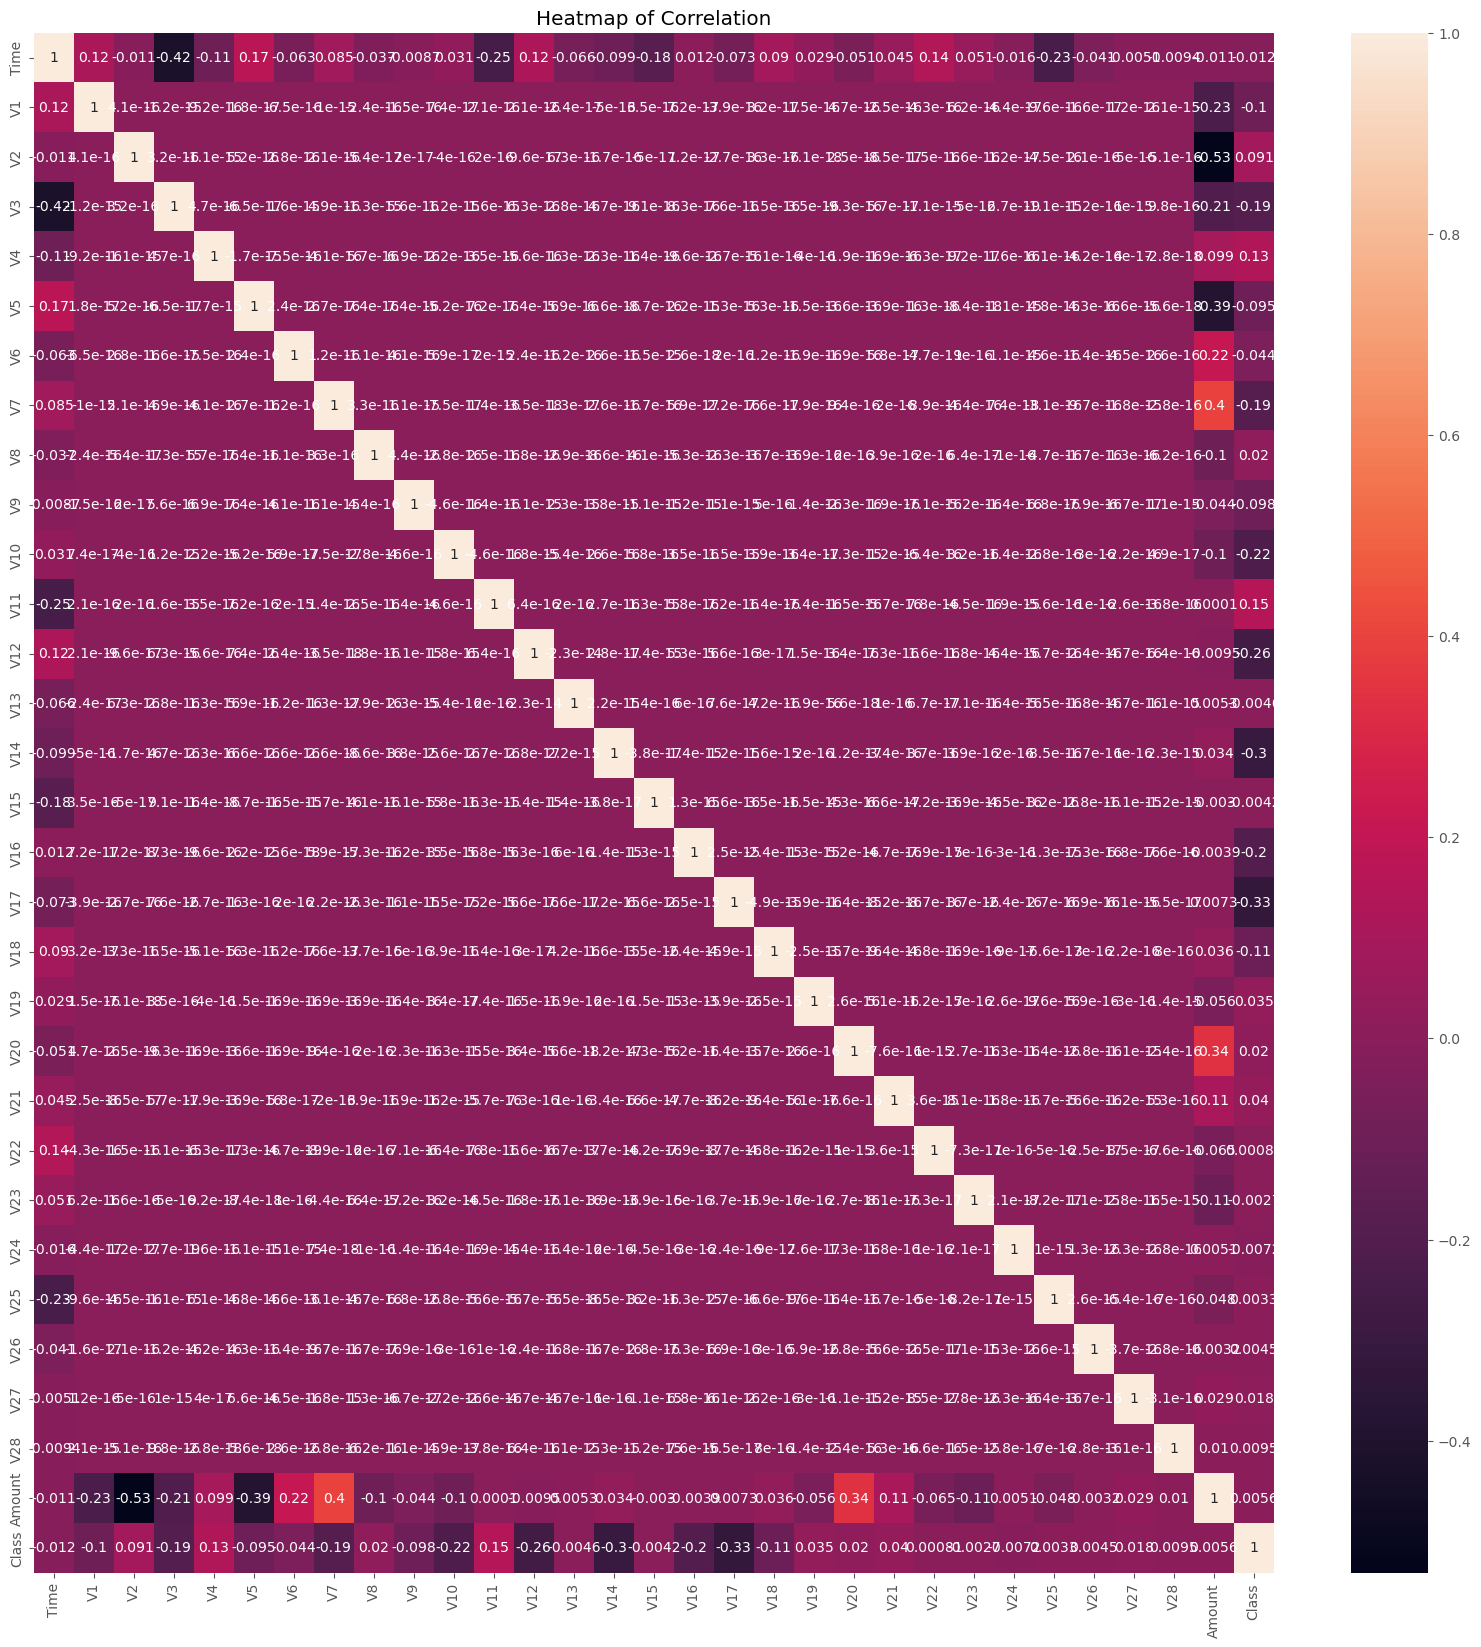

In [13]:
#heatmap
corr = df.corr()
plt.figure(figsize=(20,20))
heat = sns.heatmap(data=corr, annot=True)
plt.title('Heatmap of Correlation')

In [14]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

**Scaling Amount and Time**

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [16]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [17]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
218477,141331.0,1.863,-0.705,-0.329,0.305,-0.978,-0.673,-0.560,-0.080,1.548,...,0.082,0.087,-0.204,0.116,0.002,-0.031,74.95,0,-0.054,0.980
280425,169522.0,-0.587,0.635,1.537,-0.334,-0.096,-0.384,0.523,-0.179,0.909,...,-0.267,0.097,-0.166,-0.133,0.403,0.097,28.53,0,-0.239,1.573
266882,162523.0,2.023,0.074,-1.674,0.775,0.085,-1.056,-0.012,-0.170,0.907,...,0.131,1.055,0.036,0.583,-0.050,-0.022,0.91,0,-0.350,1.426
261291,159947.0,1.897,-0.289,-1.613,0.489,0.102,-0.589,-0.059,-0.119,0.836,...,0.143,0.389,-0.230,0.384,-0.064,-0.013,89.00,0,0.003,1.372
85629,60860.0,-2.743,-6.440,-0.703,2.708,-3.162,0.591,1.786,-0.271,0.253,...,-1.809,0.636,-0.432,-0.496,-0.305,0.381,2000.00,0,7.643,-0.715


In [18]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

**Splitting Data into Train and Test**

In [19]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256346, 31)
Test Shape: (28461, 31)


In [20]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

**Creating a subsample data set with balanced class distributions**

In [21]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 439 fraudulent transactions in the train data.


In [22]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [23]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
219042,-4.122,0.629,0.984,-0.822,-2.000,2.340,-2.965,-3.494e+00,1.518,0.692,...,-1.157,1.038,0.542,-0.078,-0.721,0.038,-0.256,0,-0.037,1.202
238610,-1.404,0.266,1.213,-0.445,-0.994,0.473,0.942,5.702e-01,-0.418,-1.261,...,-0.428,0.370,-0.495,0.417,-0.409,-0.154,0.017,0,0.744,1.409
158809,2.122,-1.715,-1.021,-1.595,-1.152,-0.106,-1.163,-1.196e-01,-1.089,1.482,...,-0.014,0.154,0.263,-0.240,-0.190,0.008,-0.025,0,0.103,0.591
69031,1.195,0.026,0.093,0.273,-0.459,-1.067,0.156,-1.355e-01,-0.118,0.082,...,-0.105,-0.046,0.558,0.420,0.572,-0.084,-0.004,0,-0.242,-0.801
31009,1.168,0.234,0.585,1.275,-0.441,-0.583,-0.065,3.176e-04,0.155,0.045,...,0.230,0.011,0.380,0.460,-0.316,0.033,0.022,0,-0.349,-1.202


In [24]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [25]:
subsample = pd.concat([selected, fraud])
len(subsample)

878

In [26]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,2.225,-0.646,-1.462,-1.109,-0.233,-0.820,-0.344,-0.321,-0.931,1.019,...,1.394,-0.095,-0.400,0.277,0.075,-0.035,-0.079,0,-0.313,1.449
1,-2.251,2.366,-2.955,0.090,-2.831,-0.844,-0.174,-0.407,0.174,-2.999,...,-0.466,0.291,0.243,-1.279,-1.124,-0.631,0.327,1,0.891,-0.433
2,-1.253,1.339,1.903,1.092,-0.588,-0.132,0.210,0.551,-0.358,-0.524,...,-0.272,-0.017,0.599,0.271,-0.405,0.114,0.070,0,-0.273,-1.122
3,2.041,-0.203,-1.205,0.238,-0.045,-0.737,-0.012,-0.095,0.498,0.280,...,-0.751,0.304,-0.371,-0.329,0.203,-0.083,-0.076,0,-0.345,1.398
4,-0.917,-0.846,0.899,1.166,0.675,0.531,-0.573,0.308,0.342,0.239,...,1.279,0.934,0.215,-0.588,0.156,0.335,0.088,0,-0.307,1.079
5,2.054,0.707,-2.361,0.748,0.705,-1.738,0.487,-0.501,0.263,-1.247,...,0.608,-0.075,-0.194,0.322,-0.104,0.031,0.011,0,-0.349,0.730
6,1.756,0.146,-2.453,2.636,3.007,3.928,0.008,0.823,-1.461,1.503,...,-0.683,0.245,0.632,-0.143,-0.240,-0.054,-0.038,0,0.048,0.534
7,-3.822,5.667,-9.245,8.246,-4.368,-3.451,-8.427,2.306,-5.338,-12.011,...,0.083,-0.062,0.390,0.330,0.098,1.870,1.001,1,-0.050,-0.021
8,0.340,2.015,-2.777,3.812,-0.462,-1.152,-2.002,0.549,-2.344,-3.077,...,-0.583,-0.188,-0.329,0.732,0.058,0.553,0.319,1,-0.346,-0.771
9,-1.971,0.511,1.544,-0.057,0.380,-0.798,0.454,0.505,-0.236,-1.274,...,-0.162,-0.303,0.370,0.746,-0.589,-0.253,-0.017,0,-0.256,-0.687


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

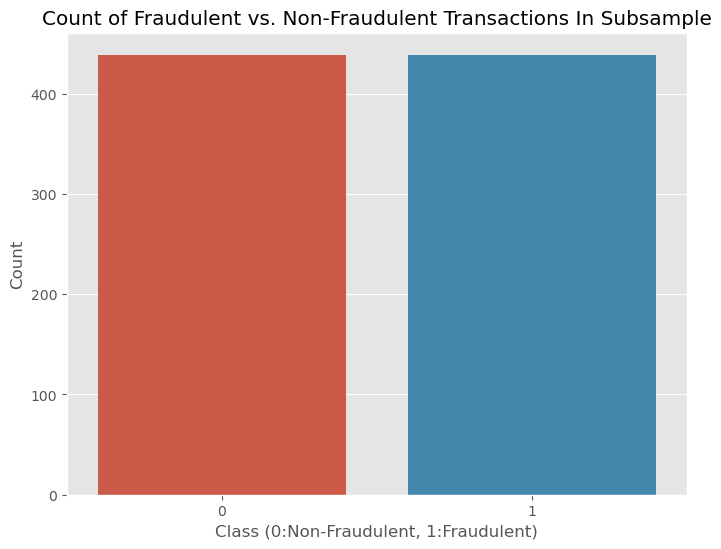

In [27]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [28]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.437
V2,0.467
V3,-0.565
V4,0.704
V5,-0.377
V6,-0.380
V7,-0.480
V8,0.044
V9,-0.545
V10,-0.626


In [29]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.565
V9,-0.545
V10,-0.626
V12,-0.678
V14,-0.746
V16,-0.592
V17,-0.561


In [30]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.704
V11,0.683
Class,1.000


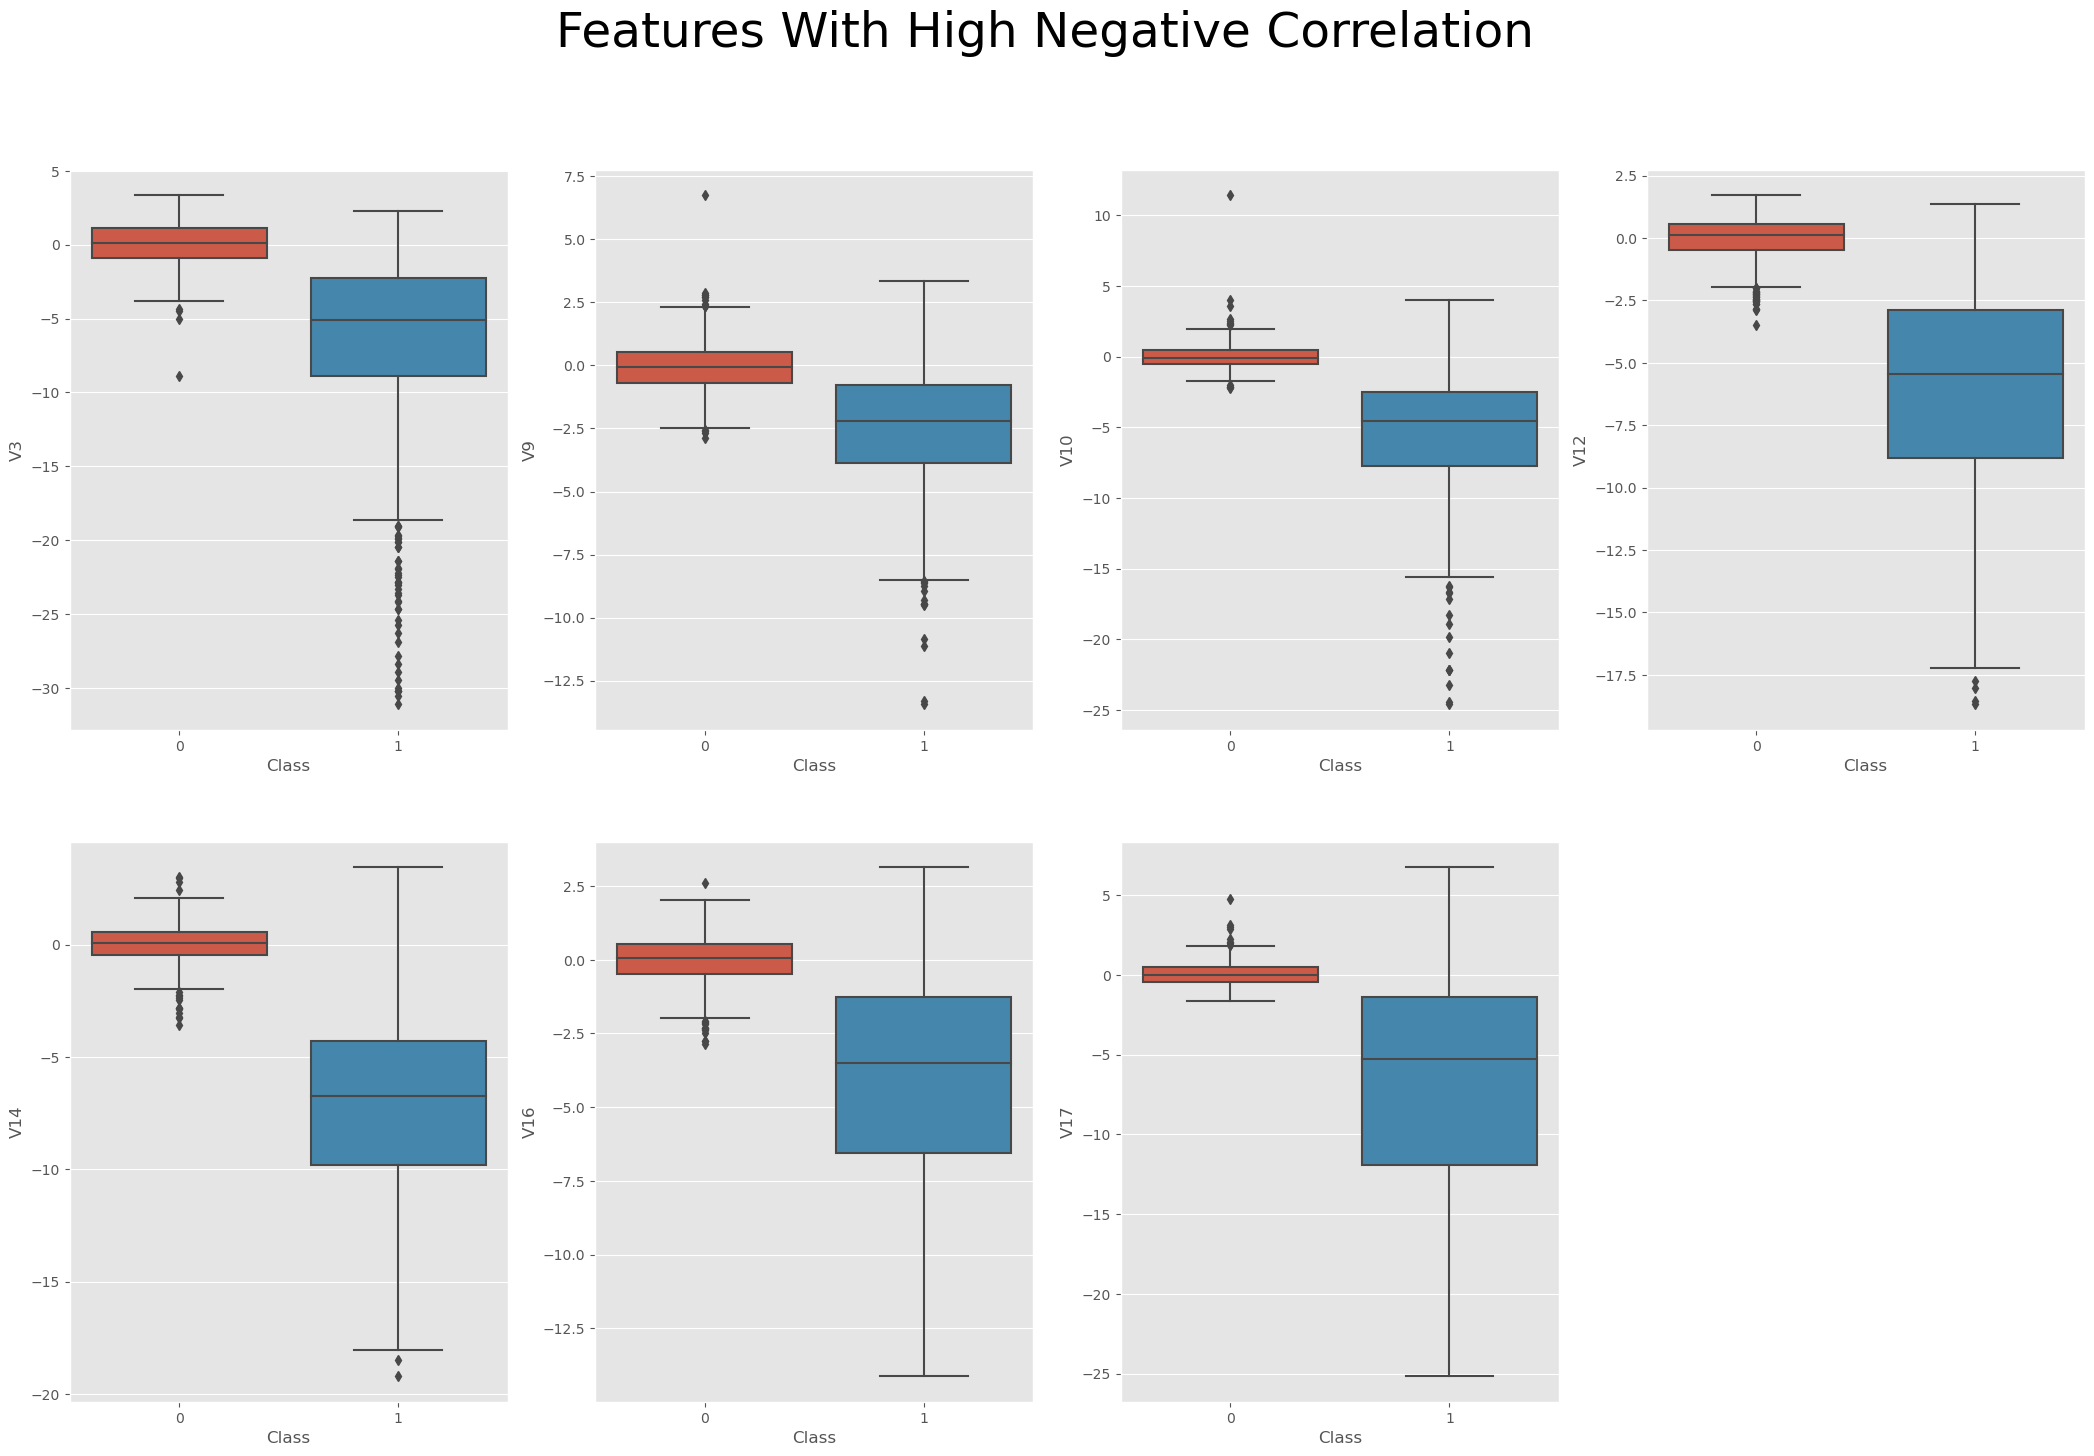

In [31]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

<AxesSubplot:xlabel='Class', ylabel='V11'>

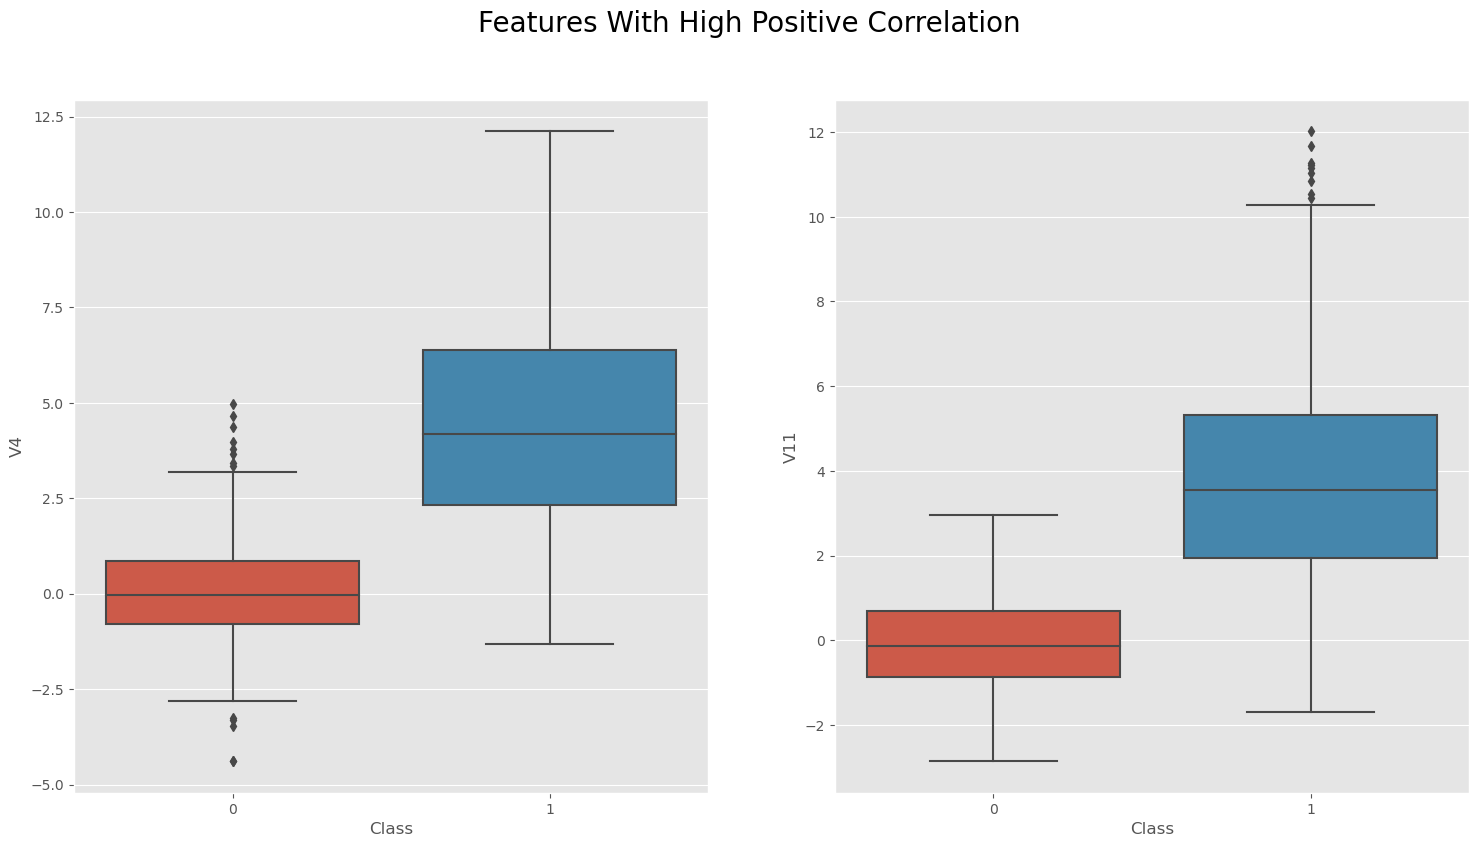

In [32]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

**Extreme Outlier Removal**

In [33]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [34]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 878 transactions by 255 transactions to 623 transactions.


**Dimensionality Reduction**

In [35]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [36]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

C:\Users\DELL\New folder (2)\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\DELL\New folder (2)\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


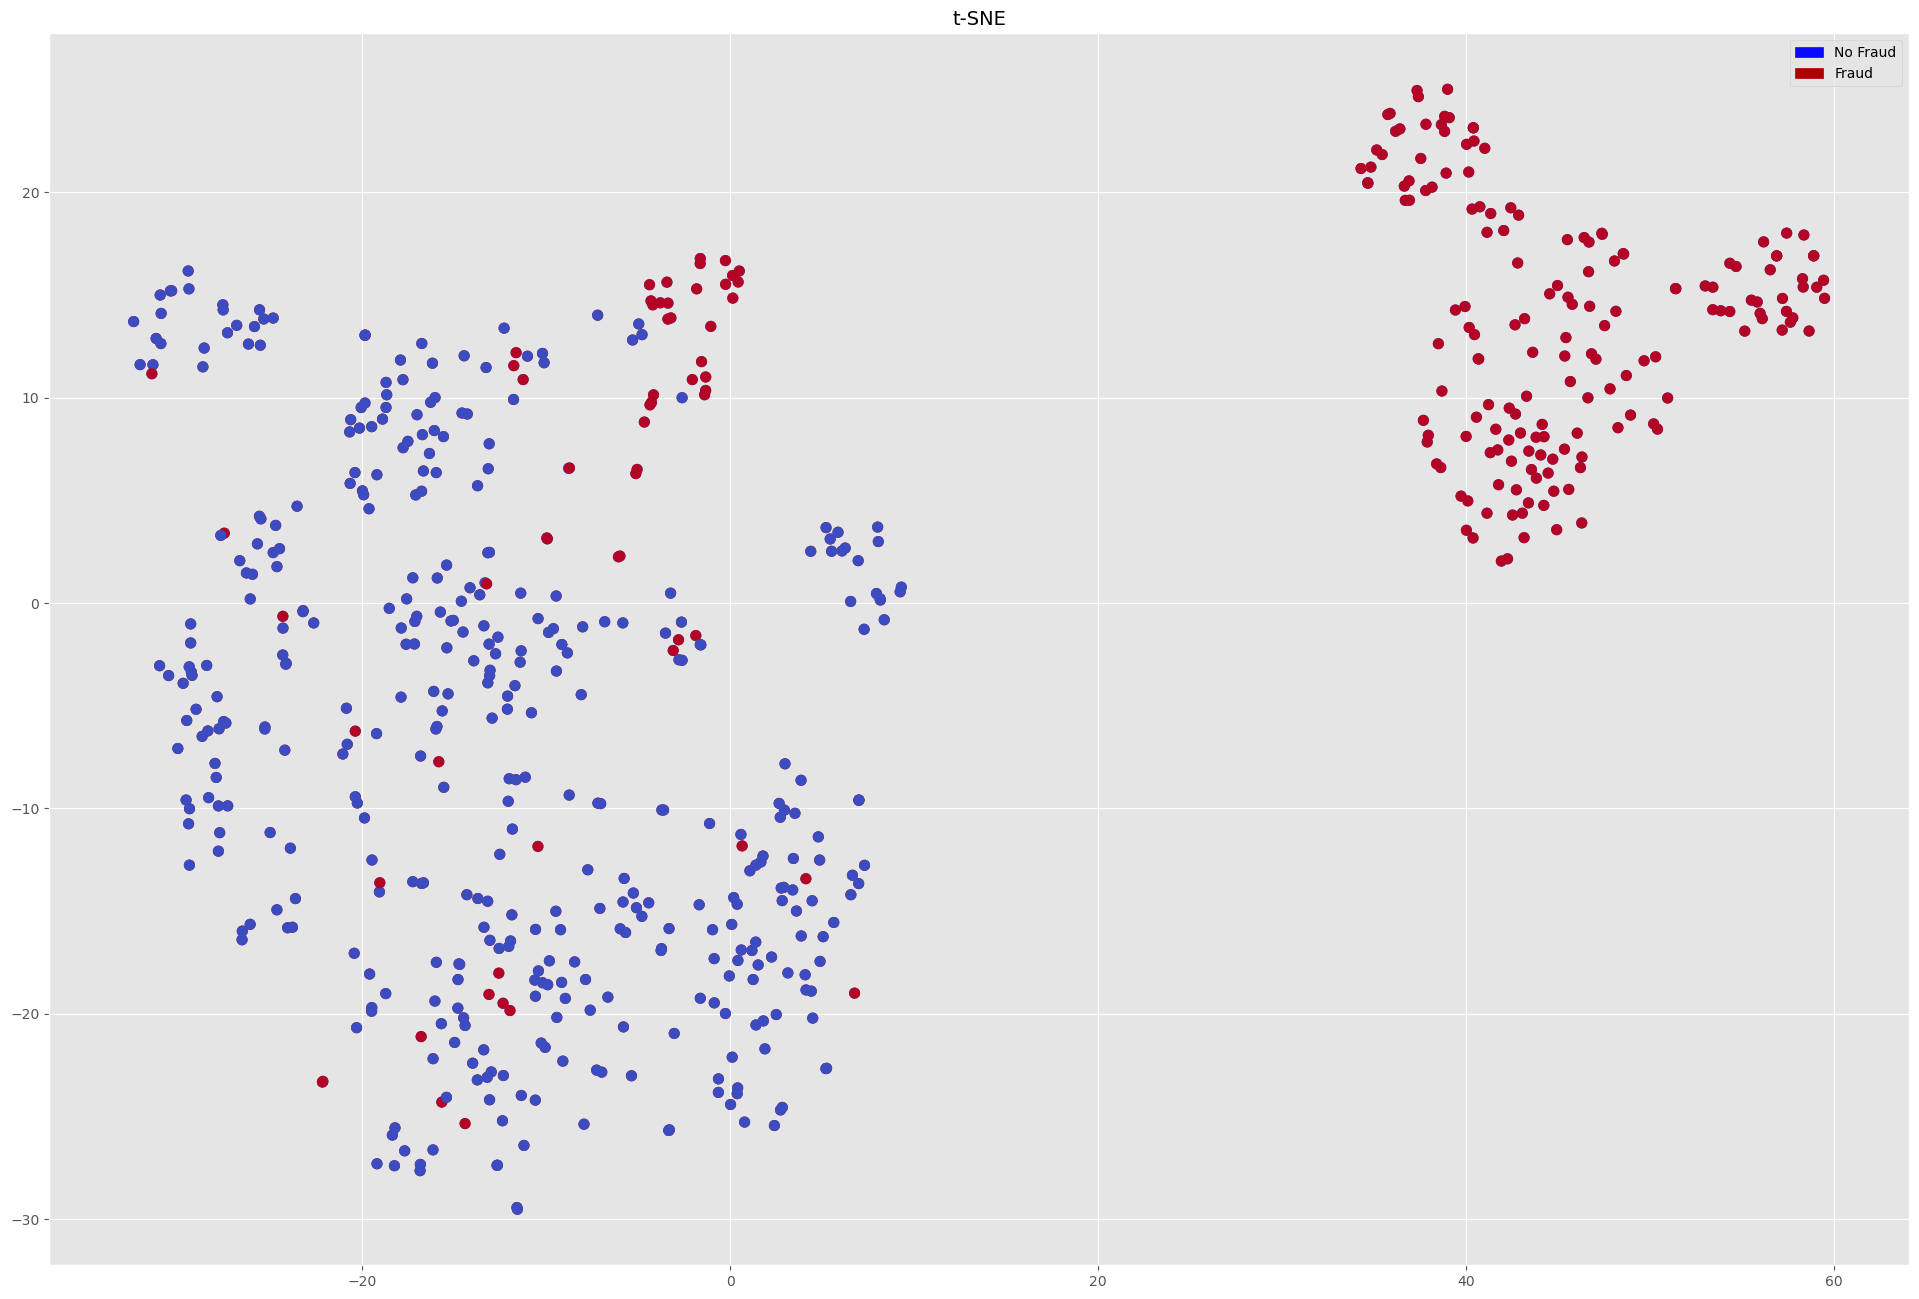

In [37]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


**Classification Algorithms**

In [38]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [39]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [41]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (498, 30) (125, 30) 

Y_shapes:
 Y_train: Y_validation:
 (498,) (125,)


In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [43]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a list of tuples containing model names and model instances
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

# Testing models
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)  # Set shuffle=True
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.959136 (0.030521)
LDA: 0.962121 (0.019680)
KNN: 0.952793 (0.039509)
CART: 0.889421 (0.045512)
SVM: 0.961675 (0.029790)
XGB: 0.964317 (0.027372)
RF: 0.966039 (0.024386)


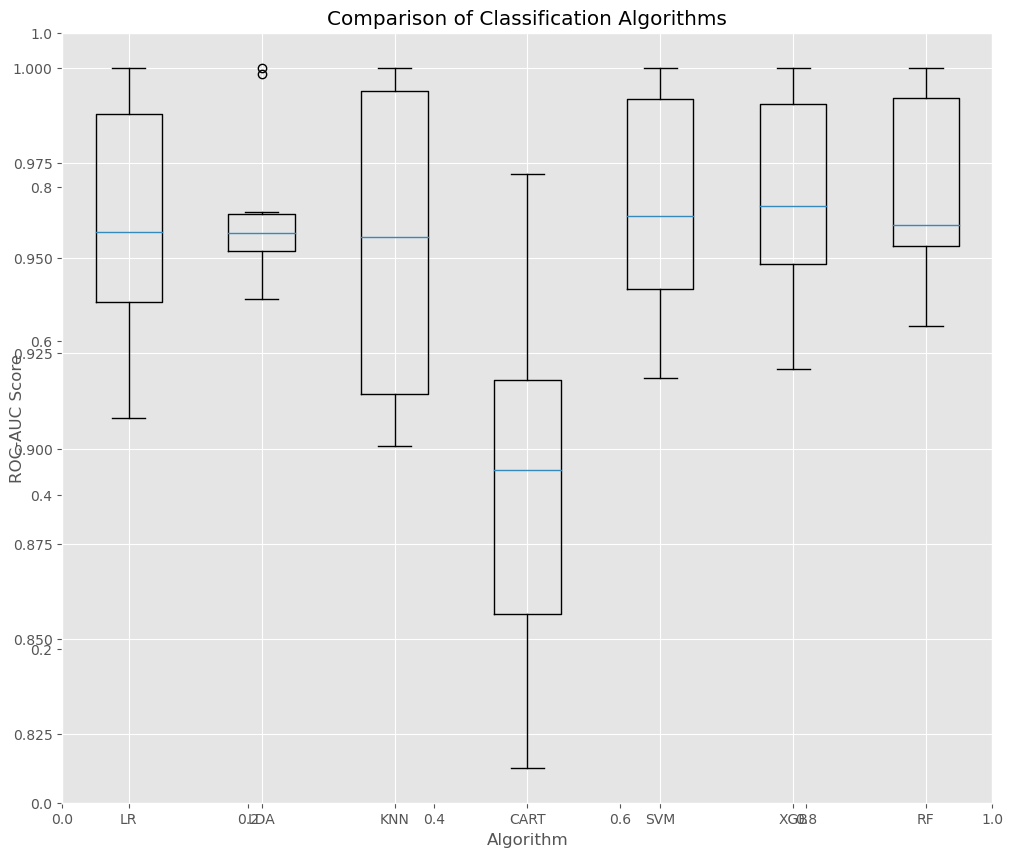

In [44]:
import matplotlib.pyplot as plt

# Your code for defining models and computing results goes here

# Check if results and names lists are not empty
if results and names:
    fig = plt.figure(figsize=(12, 10))
    plt.title('Comparison of Classification Algorithms')
    plt.xlabel('Algorithm')
    plt.ylabel('ROC-AUC Score')
    
    # Add the subplot before setting the tick labels
    ax = fig.add_subplot(111)
    
    ax.boxplot(results)
    ax.set_xticklabels(names)
    
    plt.show()
else:
    print("Results or names list is empty.")


In [45]:
##visualizing RF
#model = RandomForestClassifier(n_estimators=10)

# Train
#model.fit(X_train, y_train)
## Extract single tree
#estimator = model.estimators_[5]

#from sklearn.tree import export_graphviz
## Export as dot file
#export_graphviz(estimator, out_file='tree.dot', 
                #feature_names = X.columns.tolist(),
                #class_names = ['0',' 1'],
                #rounded = True, proportion = False, 
                #precision = 2, filled = True, shell=True)

## Convert to png using system command (requires Graphviz)
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

## Display in jupyter notebook
#from IPython.display import Image
#Image(filename = 'tree.png')

In [46]:
# ##Spot-Checking Algorithms

# models = []

# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('SVM', SVC()))
# models.append(('XGB', XGBClassifier()))
# models.append(('RF', RandomForestClassifier()))

# #testing models

# results = []
# names = []

# for name, model in models:
#     kfold = KFold(n_splits=10, random_state=42)
#     cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
#     results.append(cv_results)
#     names.append(name)
#     msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
#     print(msg)